In [74]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1

In [75]:
# Load Data
df = pd.read_csv('https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv')

print("Shape:", df.shape)
df.head()

Shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [76]:
# Basic structure test
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [77]:
# Quick stat summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [78]:
# Identify column types
target = "SalePrice"

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("Target:", target)
print("Numeric cols:", len(num_cols))
print("Categorical cols:", len(cat_cols))

Target: SalePrice
Numeric cols: 38
Categorical cols: 43


In [79]:
# Data quality report
dq = pd.DataFrame({
    "dtype": df.dtypes,
    "missing_n": df.isna().sum(),
    "missing_%": df.isna().mean() * 100,
    "unique_n": df.nunique()
}).sort_values("missing_%", ascending=False)

dq

,dtype,missing_n,missing_%,unique_n
PoolQC,object,1453,99.520548,3
MiscFeature,object,1406,96.301370,4
Alley,object,1369,93.767123,2
Fence,object,1179,80.753425,4
MasVnrType,object,872,59.726027,3
FireplaceQu,object,690,47.260274,5
LotFrontage,float64,259,17.739726,110
GarageQual,object,81,5.547945,5
GarageFinish,object,81,5.547945,3
GarageType,object,81,5.547945,6


The Data Quality Report shows that many variables have a large amount of missing data, which likely reflects the absence of those features rather than data errors. It also confirms that Id is fully unique and functions only as an identifier.

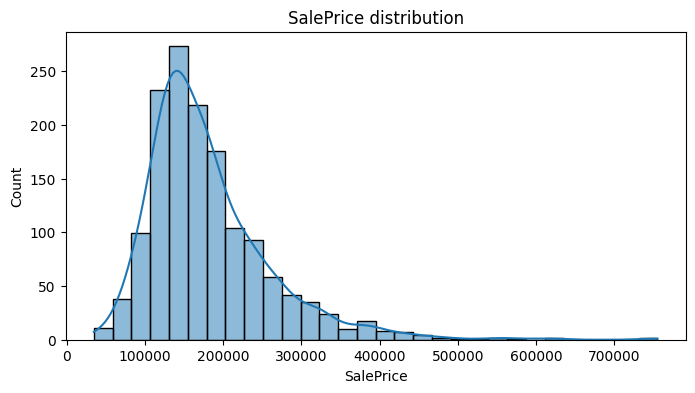

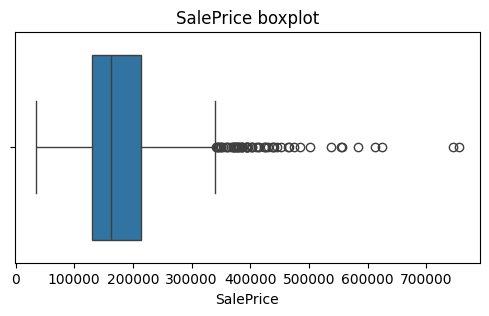

In [80]:
# Target distribution (univariate)
target = "SalePrice"

plt.figure(figsize=(8, 4))
sns.histplot(df[target], bins=30, kde=True)
plt.title("SalePrice distribution")
plt.show()

plt.figure(figsize=(6, 3))
sns.boxplot(x=df[target])
plt.title("SalePrice boxplot")
plt.show()

SalePrice is clearly right-skewed, meaning a small number of very expensive homes pull the average upward. Because the mean is sensitive to extreme values, using it can give a misleading picture of a “typical” home. The median is more stable in this situation, which is why median-based imputation makes more sense for numeric variables when the data is skewed and contains outliers.

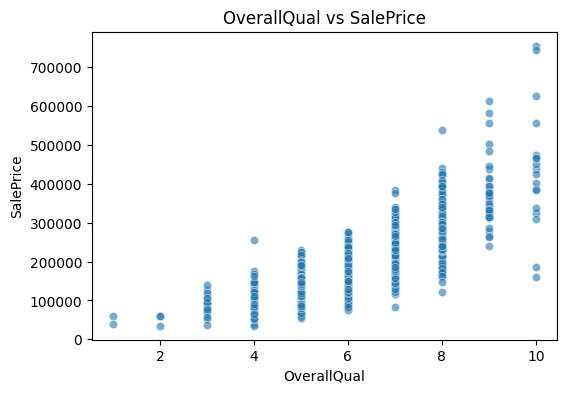

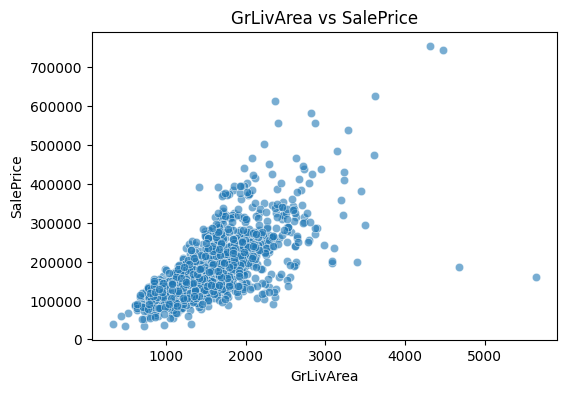

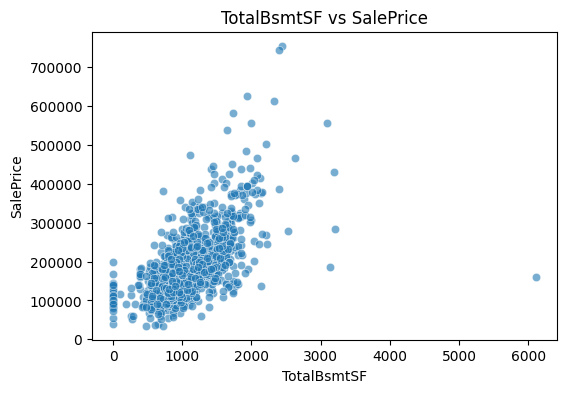

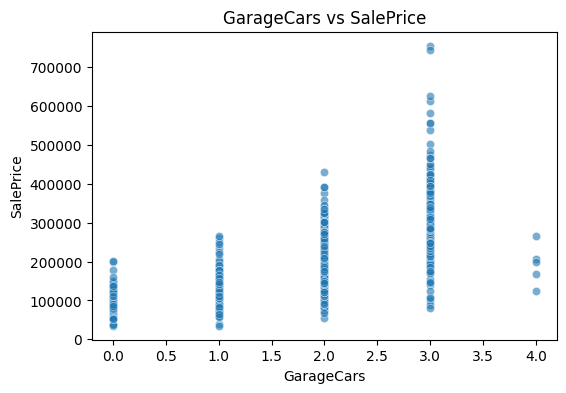

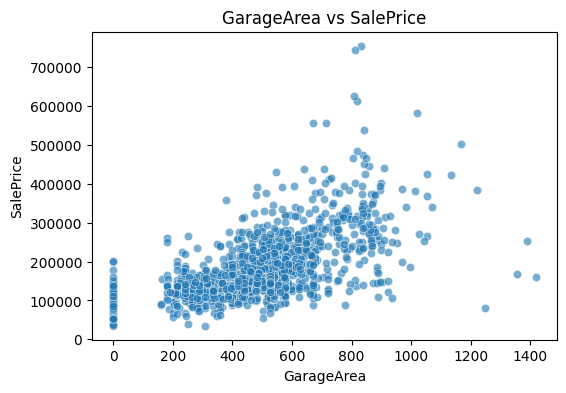

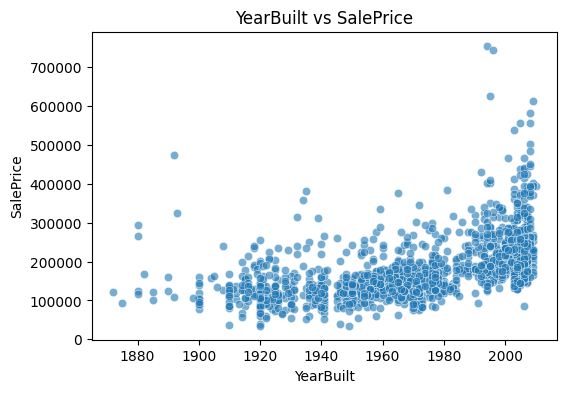

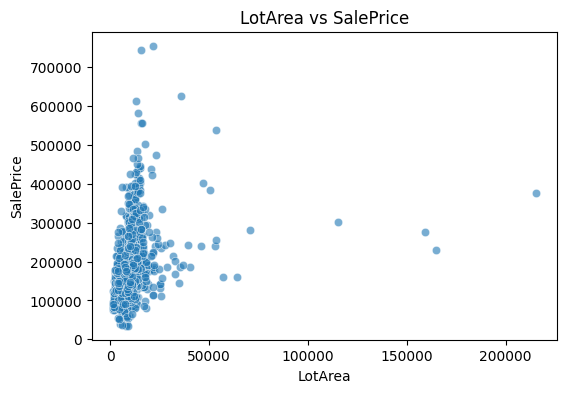

In [81]:
# Numeric vs target (bivariate)
key_num = ["OverallQual", "GrLivArea", "TotalBsmtSF", "GarageCars", "GarageArea", "YearBuilt", "LotArea"]
key_num = [c for c in key_num if c in df.columns]

for col in key_num:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y=df[target], alpha=0.6)
    plt.title(f"{col} vs {target}")
    plt.show()


Several features show strong positive relationships with SalePrice, especially overall quality and living area, indicating they are key drivers of home value. Other variables show weaker or more scattered patterns, suggesting diminishing returns or indirect effects. These plots help narrow down which features are most likely to be useful predictors.

# Part 2

In [82]:
# Cell 7: Part 2 - Fix issues from DQ report

# Drop ID column if present (IDness)
if "Id" in df.columns:
    df = df.drop(columns=["Id"])

# 2) Drop extremely high-missing columns (clean + justifiable)
high_missing_threshold = 60  # %
high_missing_cols = dq[dq["missing_%"] >= high_missing_threshold].index.tolist()
high_missing_cols = [c for c in high_missing_cols if c in df.columns]

df = df.drop(columns=high_missing_cols)

print("Dropped:", ["Id"] + high_missing_cols)
print("Shape after drops:", df.shape)

Dropped: ['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence']
Shape after drops: (1460, 76)


Columns with an extremely high missing percentage (60%) were removed because they add limited information and would require heavy assumptions to impute. The identifier column was also dropped since it carries no predictive meaning.

In [83]:
# Cell 8: Missing value imputation
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Categorical: fill missing with "None" when it means absence, otherwise fill mode
none_like = [
    "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",
    "FireplaceQu",
    "GarageType","GarageFinish","GarageQual","GarageCond",
    "PoolQC","Fence","MiscFeature","Alley",
    "MasVnrType"
]
none_like = [c for c in none_like if c in df.columns]
df[none_like] = df[none_like].fillna("None")

remaining_cat_missing = [c for c in cat_cols if df[c].isna().any()]
for c in remaining_cat_missing:
    df[c] = df[c].fillna(df[c].mode(dropna=True).iloc[0])

# Numeric: median impute - heavily skewed. To prevent inputation from affecting the statistical performance of our machine learning model, we must use the median.
remaining_num_missing = [c for c in num_cols if df[c].isna().any()]
for c in remaining_num_missing:
    df[c] = df[c].fillna(df[c].median())

print("Remaining missing values:", df.isna().sum().sum())


Remaining missing values: 0


For many categorical features, missing values simply mean the feature does not exist, so filling them with “None” preserves that information. Numeric features were filled using the median to avoid letting extreme values influence the imputed results, leaving the dataset complete without changing its overall structure.

In [84]:
# Outlier identification

# We identify outliers using IQR. We do not remove them unless clearly erroneous.
def iqr_outlier_count(data, col, k=1.5):
    q1, q3 = data[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    return int(((data[col] < lower) | (data[col] > upper)).sum()), lower, upper

outlier_rows = []
for col in key_num + [target]:
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
        n_out, lower, upper = iqr_outlier_count(df, col)
        outlier_rows.append([col, n_out, lower, upper])

outlier_report = pd.DataFrame(outlier_rows, columns=["feature", "outlier_n", "iqr_lower", "iqr_upper"]).sort_values("outlier_n", ascending=False)
outlier_report

,feature,outlier_n,iqr_lower,iqr_upper
6,LotArea,69,1481.500,17673.500
2,TotalBsmtSF,61,42.000,2052.000
7,SalePrice,61,3937.500,340037.500
1,GrLivArea,31,158.625,2747.625
4,GarageArea,21,-27.750,938.250
5,YearBuilt,7,1885.000,2069.000
3,GarageCars,5,-0.500,3.500
0,OverallQual,2,2.000,10.000


Outliers were identified using the IQR method, which flags values that fall far below or above the middle range of the data. Most of the outliers appear in size- and price-related variables, which is expected in housing data where some homes are genuinely much larger or more expensive than others. Because these values likely represent real properties rather than errors, they were kept to avoid removing meaningful observations.

# Part 3

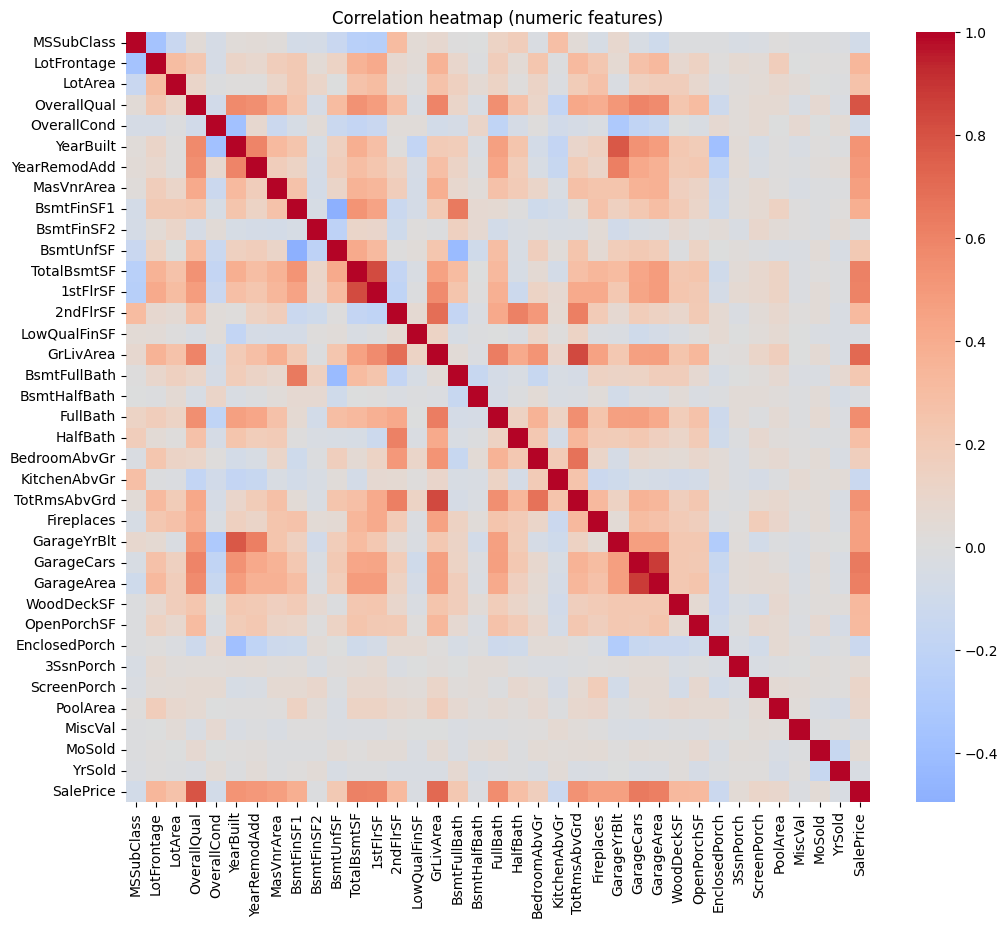

In [85]:
# Collinearity heatmap
num_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 10))
sns.heatmap(num_df.corr(), cmap="coolwarm", center=0)
plt.title("Correlation heatmap (numeric features)")
plt.show()


The correlation matrix shows that several size-based features move very closely together, which points to multicollinearity. When multiple variables capture nearly the same information, including all of them can add redundancy and make some models less stable or harder to interpret. These results help flag groups of features where keeping just one representative variable would be a better choice during feature selection.

In [86]:
# Collinearity analysis
num_df = df.select_dtypes(include="number")
corr_matrix = num_df.corr()
corr_matrix


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [87]:
# Identify highly correlated features
def high_corr_pairs(corr_matrix, threshold=0.80):
    corr_abs = corr_matrix.abs()
    upper = corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(bool))
    pairs = upper.stack().sort_values(ascending=False)
    return pairs[pairs >= threshold]

high_pairs = high_corr_pairs(num_df.corr(), threshold=0.80)
high_pairs.head(30)


,,0
GarageCars,GarageArea,0.882475
GrLivArea,TotRmsAbvGrd,0.825489
TotalBsmtSF,1stFlrSF,0.819530


Note: ChatGPT was used to generate code that was not seen in the example and to fix any code errors. Additionally, ChatGPT was used to refine some code that was very long and reword some of my analysis/explanations to make more sense.